In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('netflix1.csv')
data

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [3]:
data.shape

(8790, 10)

In [4]:
data.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [5]:
data.dtypes

,0
show_id,object
type,object
title,object
director,object
country,object
date_added,object
release_year,int64
rating,object
duration,object
listed_in,object


In [6]:
data.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
country,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0


In [7]:
data.duplicated().sum()

np.int64(0)

In [8]:
if data['director'].isnull().sum() > 0:
    data['director'] = data['director'].fillna('Unknown')
data = data.replace('Not Given', np.nan)

In [9]:
if data['country'].isnull().sum() > 0:
    data['country'] = data['country'].fillna(data['country'].mode()[0])
data.drop_duplicates(inplace=True)

In [10]:
data.head(20)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
5,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,9/24/2021,2021,TV-14,9 Seasons,"British TV Shows, Reality TV"
6,s10,Movie,The Starling,Theodore Melfi,United States,9/24/2021,2021,PG-13,104 min,"Comedies, Dramas"
7,s939,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,India,5/1/2021,2019,TV-Y7,87 min,"Children & Family Movies, Comedies, Music & Mu..."
8,s13,Movie,Je Suis Karl,Christian Schwochow,Germany,9/23/2021,2021,TV-MA,127 min,"Dramas, International Movies"
9,s940,Movie,Motu Patlu in Wonderland,Suhas Kadav,India,5/1/2021,2013,TV-Y7,76 min,"Children & Family Movies, Music & Musicals"


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      6202 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [12]:
if 'duration' in data.columns:
    print("Duration Format Analysis:")
    print(f"Sample values: {data['duration'].dropna().head(10).tolist()}")

    has_min = data['duration'].str.contains('min', na=False).sum()
    has_season = data['duration'].str.contains('Season', na=False).sum()
    total_non_null = data['duration'].notna().sum()
    malformed = total_non_null - has_min - has_season

    print(f"\nMinutes format: {has_min}")
    print(f"Seasons format: {has_season}")
    print(f"Malformed: {malformed}")

    if malformed > 0:
        print("\nMalformed duration examples:")
        malformed_mask = (~data['duration'].str.contains('min', na=False)) & \
                        (~data['duration'].str.contains('Season', na=False)) & \
                        (data['duration'].notna())
        print(data[malformed_mask][['title', 'type', 'duration']].head(10))

Duration Format Analysis:
Sample values: ['90 min', '1 Season', '1 Season', '91 min', '125 min', '9 Seasons', '104 min', '87 min', '127 min', '76 min']

Minutes format: 6126
Seasons format: 2664
Malformed: 0


In [13]:
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month_name()
data['day_added'] = data['date_added'].dt.day

print("Columns Split Successfully.")
print(data[['date_added', 'year_added', 'month_added']].head())

Columns Split Successfully.
  date_added  year_added month_added
0 2021-09-25        2021   September
1 2021-09-24        2021   September
2 2021-09-24        2021   September
3 2021-09-22        2021   September
4 2021-09-24        2021   September


In [14]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,year_added,month_added,day_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,September,25
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,September,24
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021,September,24
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",2021,September,22
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021,September,24


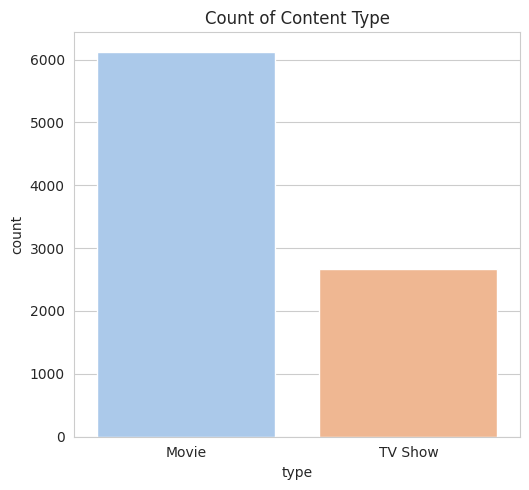

In [15]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='type', data=data, palette='pastel')
plt.title('Count of Content Type')
plt.tight_layout()
plt.show()

In [16]:
type_counts = data['type'].value_counts()
fig = px.pie(
    values=type_counts.values,
    names=type_counts.index,
    title='Distribution of Content Types',
    color_discrete_sequence=['#DDA0DD', '#40E0D0'],
    hole=0.4
)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

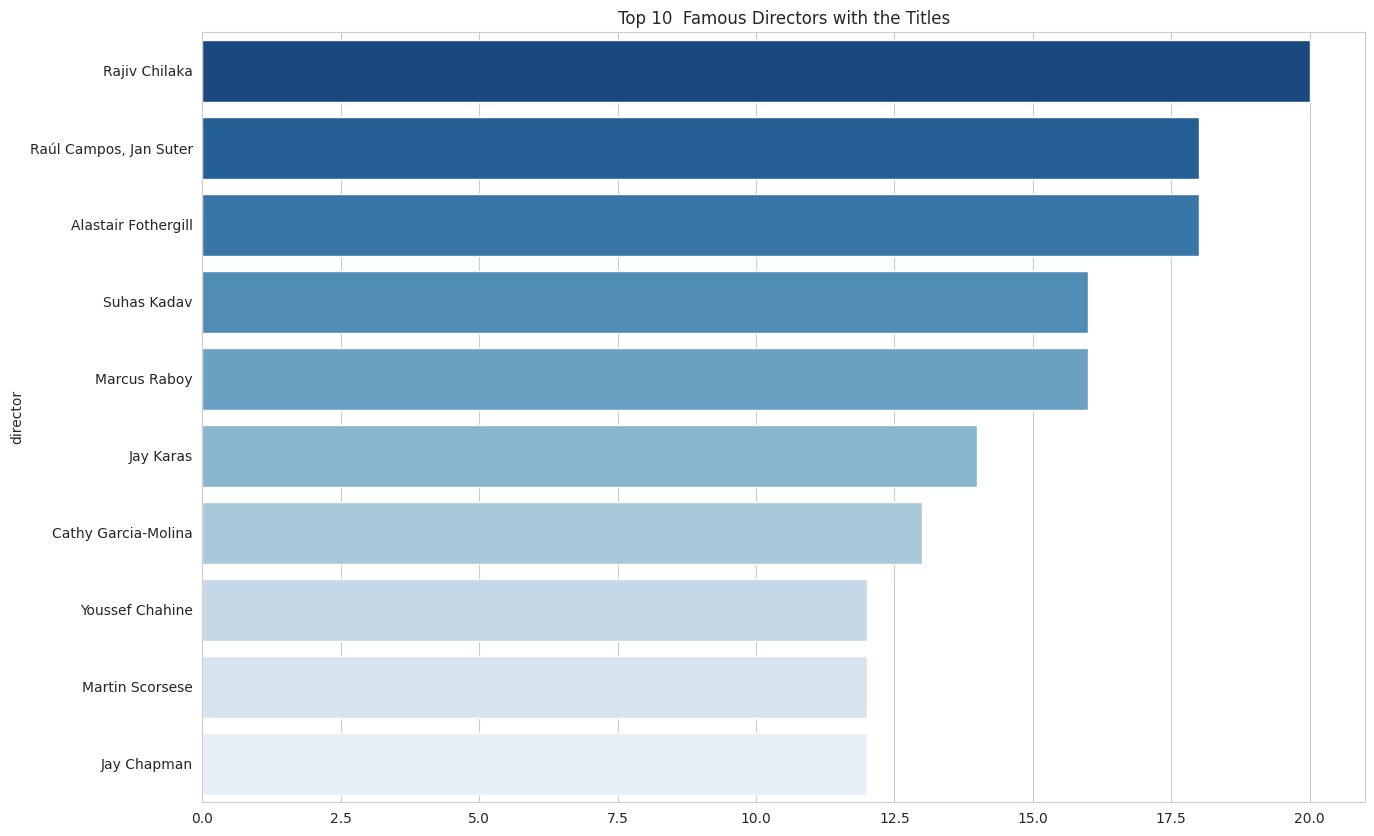

In [17]:
plt.figure(figsize=(15, 10))
top_directors = data[data['director'] != 'Unknown']['director'].value_counts().head(10)
sns.barplot(y=top_directors.index, x=top_directors.values, palette='Blues_r')
plt.title('Top 10  Famous Directors with the Titles')
plt.show()

In [18]:
Growth = data.groupby(['year_added', 'type']).size().reset_index(name='count')
Growth = Growth[Growth['year_added'] <= 2021]
fig = px.area(
    Growth,
    x='year_added',
    y='count',
    color='type',
    title='Content Added Over Time (2008-2021)',
    color_discrete_map={'Movie': '#008080', 'TV Show': '#BBF90F'}
)
fig.show()

In [19]:
rating = ['TV-Y', 'TV-Y7', 'TV-G', 'G', 'TV-PG', 'PG', 'PG-13', 'TV-14', 'TV-MA', 'R', 'NC-17']
fig = px.histogram(
    data,
    x='rating',
    color='type',
    barmode='group',
    title='Distribution of Ratings Through Type',
    category_orders={'rating': rating},
    color_discrete_map={'Movie': '#029386', 'TV Show': '#b20710'}
)
fig.show()

In [20]:
data['primary_list'] = data['listed_in'].apply(lambda x: x.split(',')[0].strip())
top_list = data['primary_list'].value_counts().head(20)
fig = px.bar(
    x=top_list.values,
    y=top_list.index,
    orientation='h',
    title='Top 20 Primary Genres',
    labels={'x': 'Count', 'y': 'Genre'},
    color=top_list.values,
    color_continuous_scale='balance'
)
fig.update_layout(yaxis={'categoryorder': 'total ascending'})
fig.show()

In [21]:
fig = px.histogram(
    data[data['type'] == 'Movie'],
    x='duration',
    title='Movie Duration Distribution',
    nbins=50,
    color_discrete_sequence=['#b20710']
)
fig.add_vline(x=90, line_dash="dash", line_color="black", annotation_text="90 min")
fig.show()

In [22]:
country = data['country'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
country = country[country != 'Unknown Country']
country_counts = country.value_counts().reset_index(name='count')
country_counts.columns = ['country', 'count']

fig = px.choropleth(
    country_counts,
    locations='country',
    locationmode='country names',
    color='count',
    title='Global Content Remark',
    color_continuous_scale='mint',
    range_color=(0, 500)
)
fig.show()

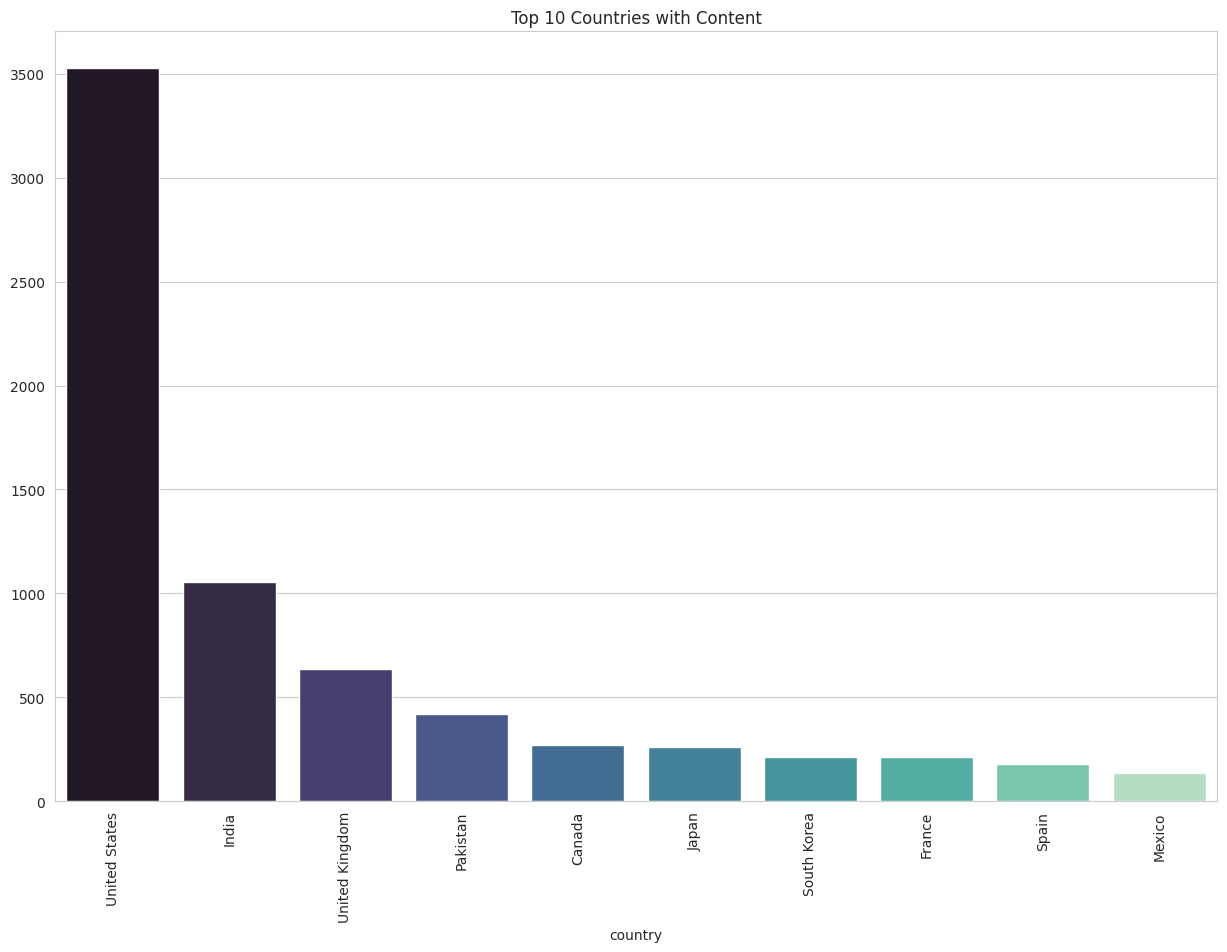

In [23]:
plt.figure(figsize=(15, 10))
countries = data['country'].value_counts().head(10)
sns.barplot(x=countries.index, y=countries.values, palette='mako')
plt.title('Top 10 Countries with Content')
plt.xticks(rotation=90)
plt.show()

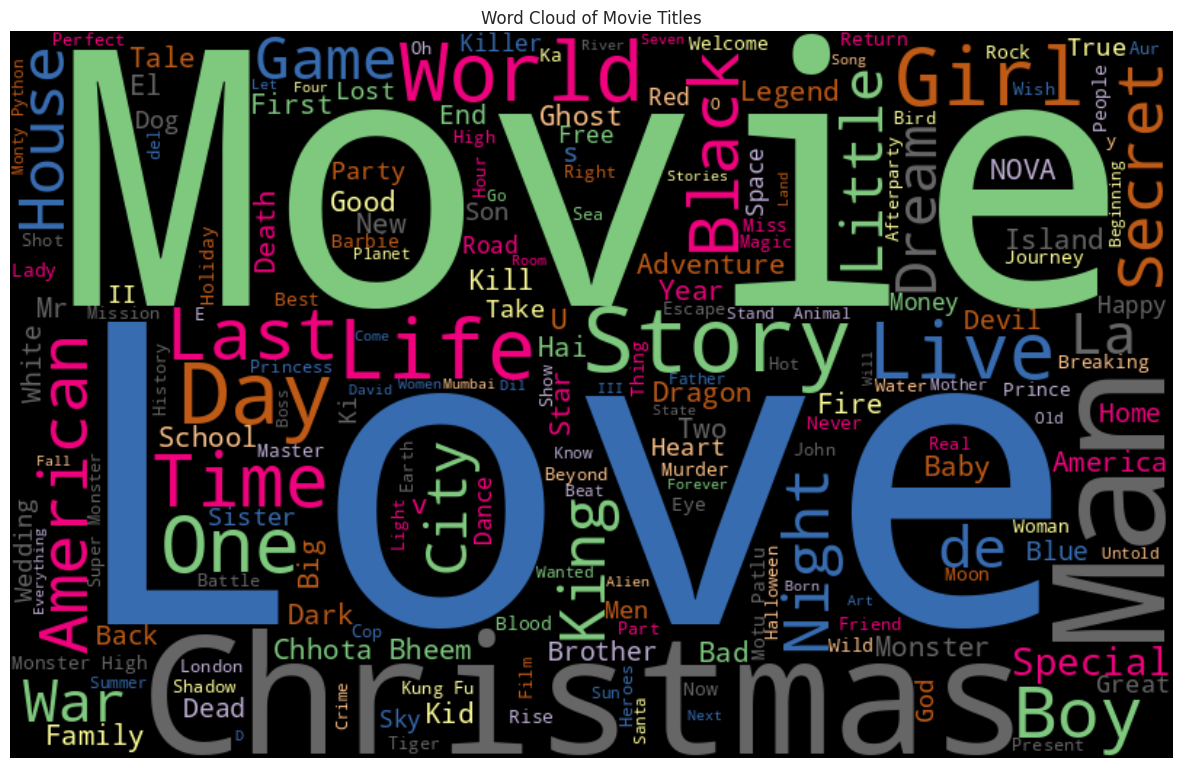

In [24]:
plt.figure(figsize=(15, 10))
Movie_titles = data[data['type'] == 'Movie']['title'].dropna()
text = ' '.join(Movie_titles)
wordcloud = WordCloud(width=800, height=500, background_color='black', colormap='Accent').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Titles')
plt.show()